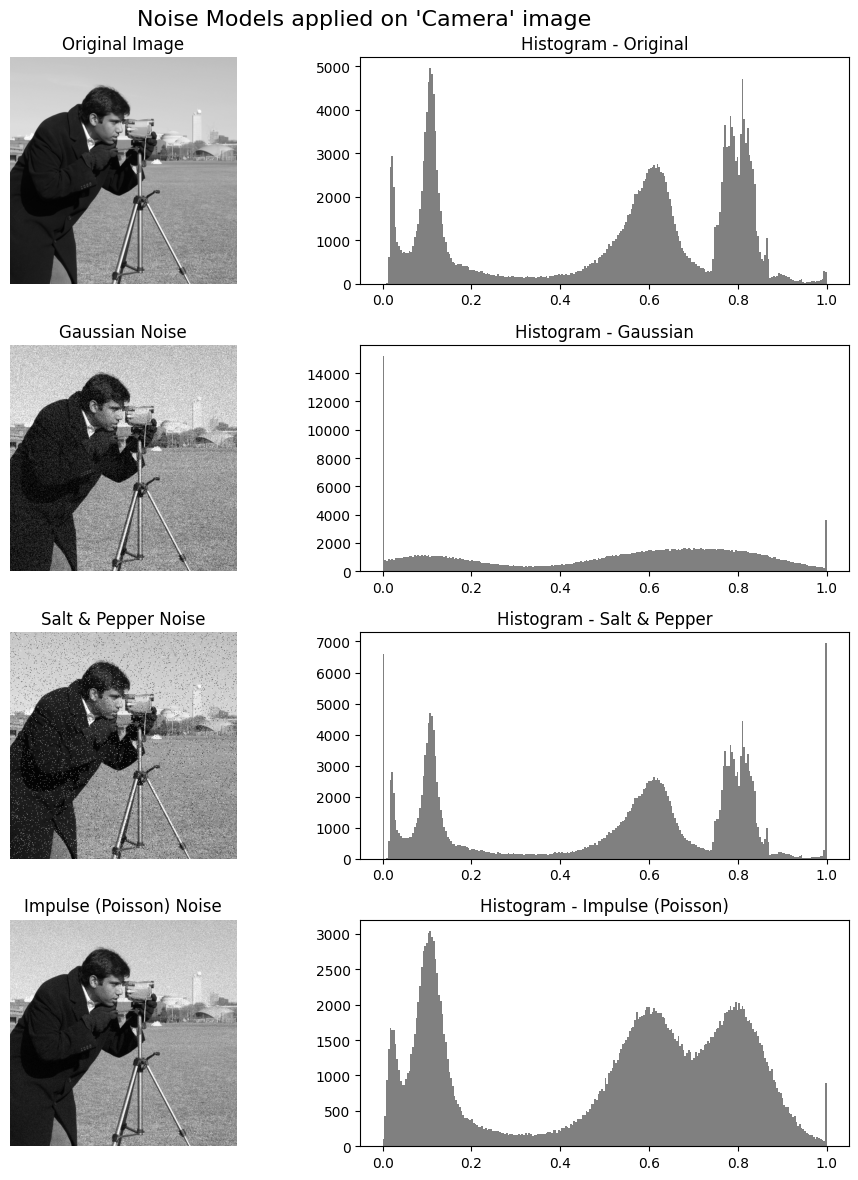

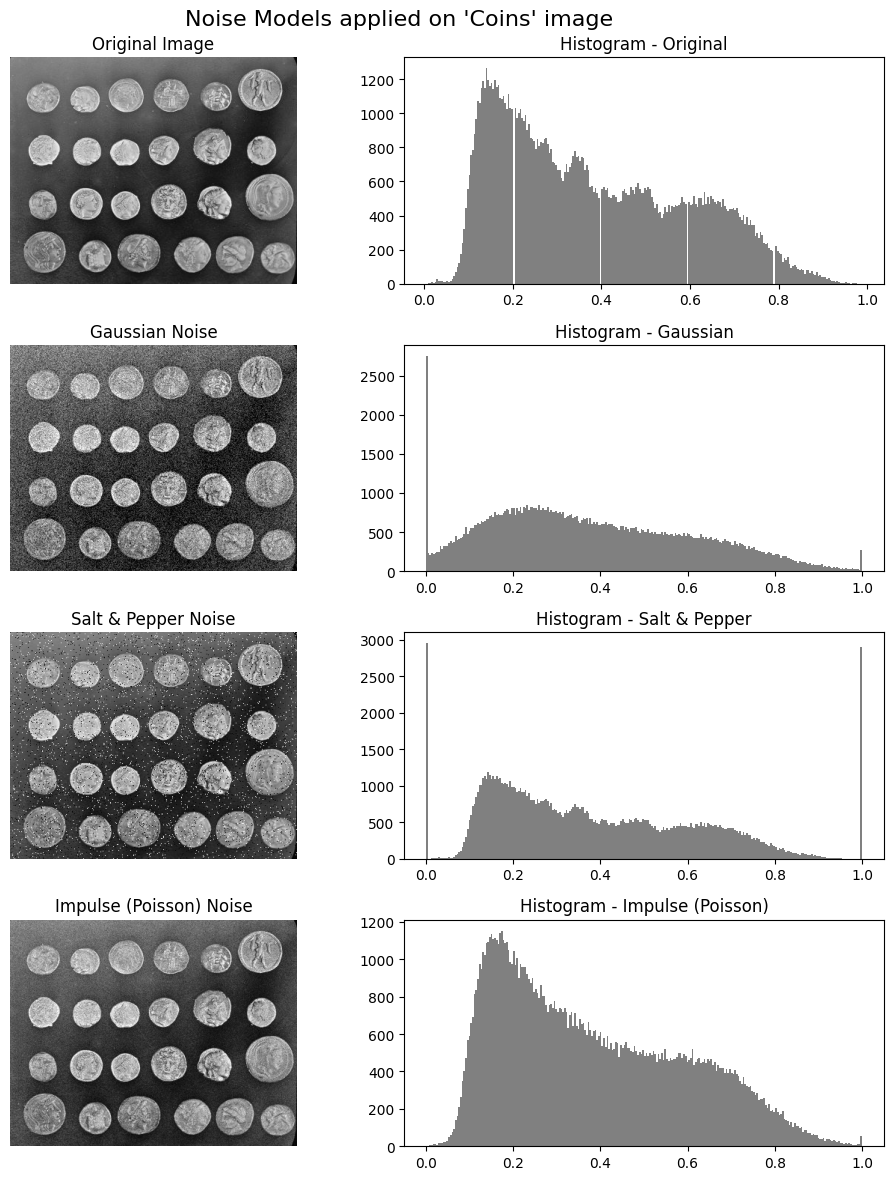

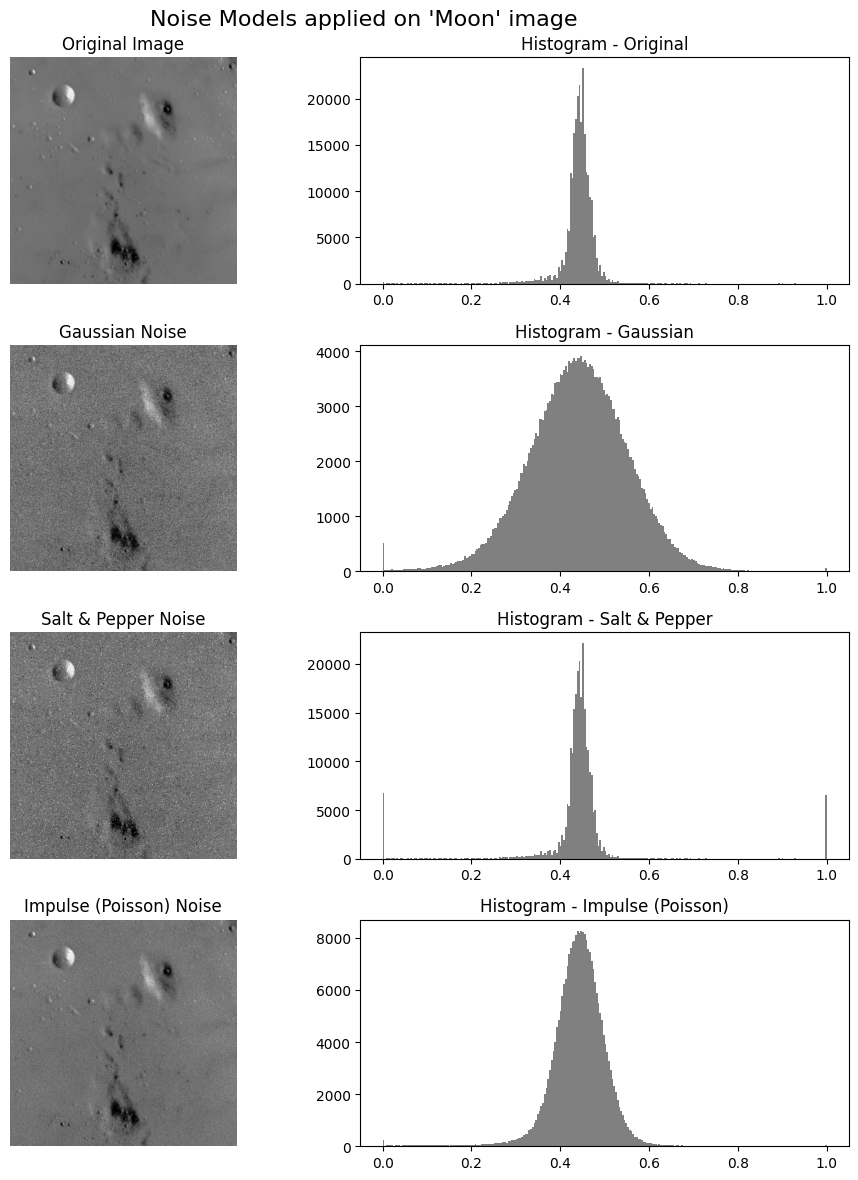

In [1]:
# --- Import required libraries ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, data, img_as_float
from google.colab import files
import os

# --- Step 1: Load sample dataset ---
# We’ll use few built-in images from skimage to act as our dataset
dataset = {
    "Camera": img_as_float(data.camera()),
    "Coins": img_as_float(data.coins()),
    "Moon": img_as_float(data.moon())
}

# --- Step 2: Define noise functions ---
def add_gaussian_noise(image, mean=0, var=0.01):
    noisy = util.random_noise(image, mode='gaussian', mean=mean, var=var)
    return noisy

def add_salt_pepper_noise(image, amount=0.05):
    noisy = util.random_noise(image, mode='s&p', amount=amount)
    return noisy

def add_impulse_noise(image):
    # Using Poisson noise as impulse-like noise
    noisy = util.random_noise(image, mode='poisson')
    return noisy

# --- Step 3: Plot function ---
def plot_images_and_histograms(original, gaussian, sp, impulse, title):
    fig, axes = plt.subplots(4, 2, figsize=(10, 12))
    fig.suptitle(f"Noise Models applied on '{title}' image", fontsize=16)

    # Original Image
    axes[0,0].imshow(original, cmap='gray')
    axes[0,0].set_title("Original Image")
    axes[0,0].axis('off')
    axes[0,1].hist(original.ravel(), bins=256, color='gray')
    axes[0,1].set_title("Histogram - Original")

    # Gaussian Noise
    axes[1,0].imshow(gaussian, cmap='gray')
    axes[1,0].set_title("Gaussian Noise")
    axes[1,0].axis('off')
    axes[1,1].hist(gaussian.ravel(), bins=256, color='gray')
    axes[1,1].set_title("Histogram - Gaussian")

    # Salt & Pepper Noise
    axes[2,0].imshow(sp, cmap='gray')
    axes[2,0].set_title("Salt & Pepper Noise")
    axes[2,0].axis('off')
    axes[2,1].hist(sp.ravel(), bins=256, color='gray')
    axes[2,1].set_title("Histogram - Salt & Pepper")

    # Impulse Noise (Poisson)
    axes[3,0].imshow(impulse, cmap='gray')
    axes[3,0].set_title("Impulse (Poisson) Noise")
    axes[3,0].axis('off')
    axes[3,1].hist(impulse.ravel(), bins=256, color='gray')
    axes[3,1].set_title("Histogram - Impulse (Poisson)")

    plt.tight_layout()
    plt.show()

# --- Step 4: Apply noise models and display results ---
for name, img in dataset.items():
    gaussian_img = add_gaussian_noise(img)
    sp_img = add_salt_pepper_noise(img)
    impulse_img = add_impulse_noise(img)
    plot_images_and_histograms(img, gaussian_img, sp_img, impulse_img, name)
